In [2]:
import numpy as np
import math
import scipy as sp
from scipy import optimize
from numpy import genfromtxt
import pandas as pd 
import pymc3 as pm
import arviz as az
import statistics as stats
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# This isn't super fancy code. I'm just trying out a bunch of distributions for insight into priors and whatnot. This code just graphs them.

uniform = np.random.uniform(0,100,1000000)
normal = np.random.normal(0,100,1000000)
log_uniform = np.log(np.random.uniform(0,100,1000000))
log_small_uniform = np.log(np.random.uniform(-0.000000001,4,1000000))
small_uniform = np.random.uniform(-0.000000001,4,1000000)
exp_uniform = 10.0**(np.random.uniform(math.log10(0.000000001),math.log10(4),1000000))
exp_nat_uniform = np.exp(np.random.uniform(math.log(0.000000001),math.log(4),1000000))


log_normal = np.random.lognormal(4.577,1, 1000000) # This was where it all went wrong
normal_for_log = np.random.normal(4.577,10, 1000000) # This was better
e_log_normal = np.exp(-normal_for_log[((normal_for_log>(-math.log(8.4)))*(normal_for_log<(-math.log(10**-8))))]) # Truncate it appropriately
#e_log_normal = np.exp(-normal_for_log)

In [1]:
bins = [0,10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,1,10,10**100]
#print(bins)

[2.11137513e-05 1.44424305e-04 2.69398296e-08 ... 9.27241693e-03
 1.73316470e+00 2.81409303e-08]
[0, 41241, 53707, 66590, 77370, 86117, 90950, 91020, 86666, 72346, 0]
(array([    0, 41241, 53707, 66590, 77370, 86117, 90950, 91020, 86666,
       72346,     0], dtype=int64), array([0, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
       10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000],
      dtype=object))


<function matplotlib.pyplot.show(close=None, block=None)>

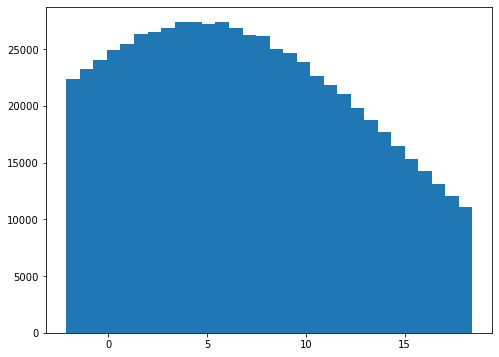

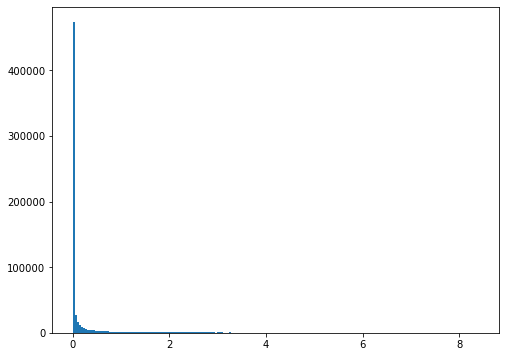

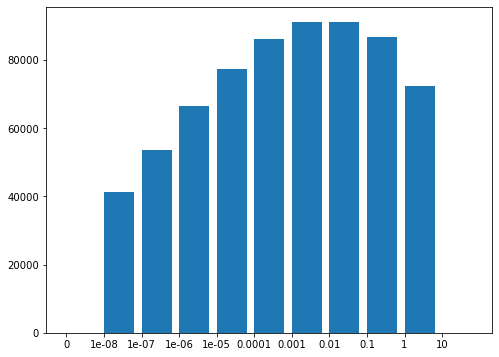

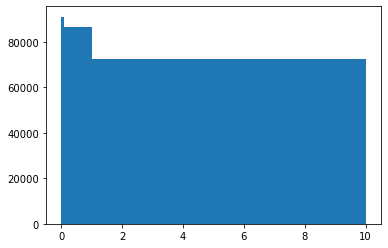

In [26]:
# This is pretty simple. It just graphs the different distributions. I suck at matplotlib (plt), so my code here is super inelegant. It works though!

plt.figure(figsize=(8,6))
plt.hist(normal_for_log[((normal_for_log>(-math.log(8.4)))*(normal_for_log<(-math.log(10**-8))))],30,width=0.7)

dist = e_log_normal
#plt.hist(dist,10)
#plt.show
#plt.hist(dist,100)
#plt.show
print(dist)
m_h = []
for i in range(len(bins)-1):
    m_h.append(np.size(dist[(dist>bins[i])*(dist<bins[i+1])]))
print(m_h)
plt.figure(figsize=(8,6))
plt.hist(dist,200) #bins
plt.show

hist = np.histogram(dist,bins)
print(hist)
plt.figure(figsize=(8,6))
plt.bar(range(np.size(hist[0])),hist[0], align='edge',tick_label=hist[1][:-1])


plt.figure()
plt.hist(dist,bins[1:-1]) #bins
plt.show
# The last figure is confusing. Ignore it!

In [71]:
exp_sd = np.random.exponential(10,100000)

10.046488531278069

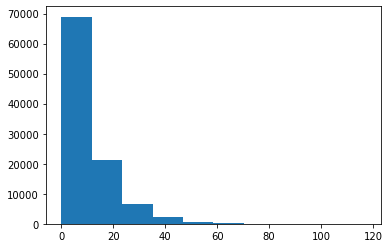

In [73]:
# I used an exponential distribution for sd_b. This was testing that out. That kind of distribution seems to be favored for stdev according to online info.

dist=exp_sd
plt.hist(dist)
plt.show
np.average(dist)

In [88]:
# This just examines averages and whatnot of different distributions. Again, helpful for informing priors. Something weird happens here with averages, logs of averages, and 
#    averages of logs when you're using a truncated distribution. I don't have time to explore it fully, but definitely check that out. The hyperpriors for beta could be faulty because of this.

norm_examples = np.random.normal(4.577,1,10)
for ex in norm_examples:
    print("ex:",ex)
    minidist = np.random.normal(ex,10, 100000)
    trunc_mini = minidist[((minidist>(-math.log(8.4)))*(minidist<(-math.log(10**-8))))]
    e_mini = np.exp(-trunc_mini)
    print("trunc ave",np.average(trunc_mini))
    print("e of ex",math.exp(-ex))
    print("e of trunc ave",math.exp(-np.average(trunc_mini)))
    print("ave e of trunc",np.average(e_mini))
    print("size",np.size(trunc_mini))
    print()

ex: 5.513056117282704
trunc ave 7.367906508975215
e of ex 0.004033760880310662
e of trunc ave 0.0006311881837041114
ave e of trunc 0.3949116193198734
size 67978

ex: 5.620450983564707
trunc ave 7.385057662055119
e of ex 0.0036230068239431934
e of trunc ave 0.0006204548858697337
ave e of trunc 0.39736281130726675
size 68104

ex: 2.611364158760116
trunc ave 6.461082068844499
e of ex 0.07343429936119669
e of trunc ave 0.0015631034094661204
ave e of trunc 0.49282102469589817
size 62646

ex: 5.682897289400812
trunc ave 7.404281809201338
e of ex 0.0034036826900643758
e of trunc ave 0.0006086410887641821
ave e of trunc 0.3832245409569546
size 68354

ex: 2.9957598100444462
trunc ave 6.626669659369083
e of ex 0.049998623194433524
e of trunc ave 0.0013245670079950714
ave e of trunc 0.4746134587511029
size 63714

ex: 2.268751034021601
trunc ave 6.354346768007924
e of ex 0.10344129409389771
e of trunc ave 0.0017391709096699817
ave e of trunc 0.5182345196899935
size 61937

ex: 3.6914190343903908
tr